# Desafio do Titanic - Kaggle
https://www.kaggle.com/competitions/titanic

Etapas do CRISP-DM:
1.   Compreender o Negócio
2.   Compreender os dados
3.   Preparar os dados
4.   Modelagem
5.   Avaliação
6.   Apresentar resultados

## Compreender os dados (Data Understanding)

In [2]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar base de treino titanic
train = pd.read_csv("train.csv")

# Importar base de teste titanic
test = pd.read_csv("test.csv")

In [3]:
# Visualizar tabela (5 primeiras linhas)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# N° de linhas e N° de colunas
train.shape

(891, 12)

In [5]:
# Resumo das informações do DataFrame, incluindo tipos de dados e valores não nulos
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Estatísticas descritivas das colunas numéricas do DataFrame
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Contagem o número de valores únicos em cada coluna
contagem_unicos = train.nunique()
print(contagem_unicos)

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


<Axes: xlabel='Embarked', ylabel='Survived'>

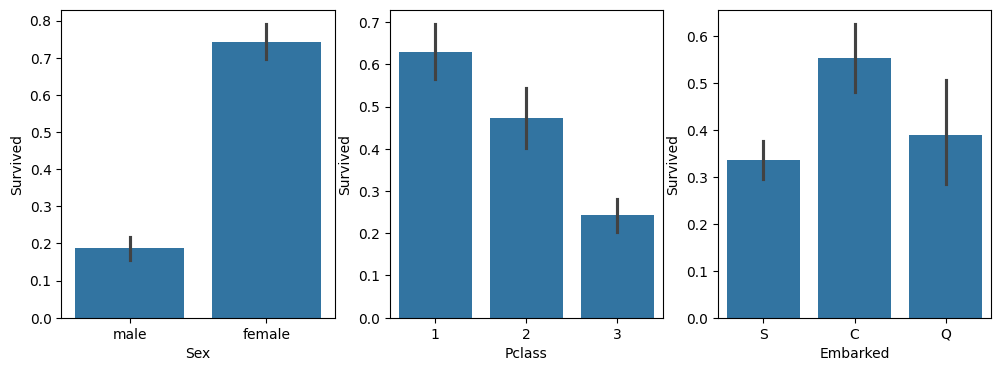

In [8]:
# Plotar os gráficos para Survived vs. Sex, Pclaas e Embarked
fig, (axisl, axis2, axis3)=plt.subplots (1,3, figsize=(12,4))
sns.barplot(x= 'Sex', y='Survived', data=train, ax=axisl)
sns.barplot(x= 'Pclass', y='Survived', data=train, ax=axis2)
sns.barplot(x= 'Embarked', y='Survived', data=train, ax=axis3)

### Analisando valores nulos - Base de treino

In [9]:
# Contagem de valores nulos de cada coluna
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


#### Coluna 'Embarked'

In [10]:
# Coluna Embarked tem 2 valores nulos

# Filtrar as linhas com valores nulos na coluna 'Embarked'
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


#### Coluna 'Age'

In [11]:
# Calcular porcentagem de valores nulos em relação ao total
percentual_nulos = train['Age'].isnull().mean() * 100

print(f'Porcentagem de valores nulos: {percentual_nulos:.2f}%')

Porcentagem de valores nulos: 19.87%


In [12]:
# A coluna Age tem 177 valores nulos

# Estatísticas descritivas da coluna Age
train['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


<Axes: ylabel='Frequency'>

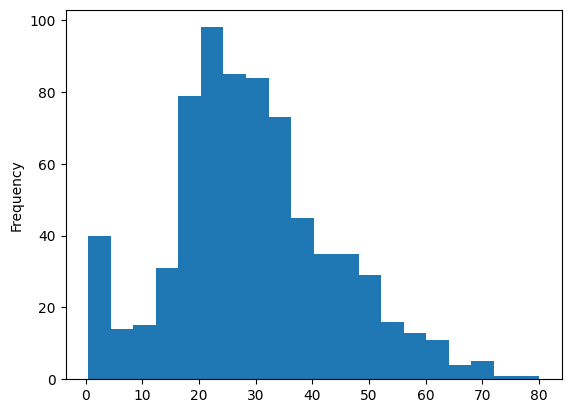

In [13]:
# Histograma da coluna Age dividindo os dados em 20 faixa
train.Age.plot.hist(bins=20)

Captura da mediana da coluna 'Age' agrupada pelas colunas 'Pclass' e 'Sex' afim de utilizar esses dados para preencher os campos nulos na coluna 'Age'.

In [14]:
# Cálculo da mediana da coluna Age, agrupando por Pclass e Sex
train.groupby(['Pclass', 'Sex'])['Age'].median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

#### Coluna 'Cabin'

A partir da análise abaixo percebe-se que manter a coluna em quetão é inviável pelos seguintes motivos:
* Alta cardinalidade (147 valores distintos)
* Valores agrupados (Ex.: "C23 C25 C27")
* Muitos valores nulos (77.10% da base)

In [15]:
# Calcular porcentagem de valores nulos em relação ao total
percentual_nulos = train['Cabin'].isnull().mean() * 100

print(f'Porcentagem de valores nulos: {percentual_nulos:.2f}%')

Porcentagem de valores nulos: 77.10%


In [16]:
# Contar as ocorrências de cada cabine no dataset
train.Cabin.value_counts()

,count
Cabin,
B96 B98,4
G6,4
C23 C25 C27,4
C22 C26,3
F33,3
...,...
E34,1
C7,1
C54,1


### Analisando valores nulos - Base de teste

In [17]:
# Contagem de valores nulos de cada coluna da base de teste
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


#### Coluna 'Age'

In [18]:
# Calcular porcentagem de valores nulos em relação ao total
percentual_nulos = test['Age'].isnull().mean() * 100

print(f'Porcentagem de valores nulos: {percentual_nulos:.2f}%')

Porcentagem de valores nulos: 20.57%


In [19]:
# Repetindo processo para base de teste
test.groupby(['Pclass', 'Sex'])['Age'].median()

Pclass  Sex   
1       female    41.0
        male      42.0
2       female    24.0
        male      28.0
3       female    22.0
        male      24.0
Name: Age, dtype: float64

#### Coluna 'Fare'

In [20]:
# Coluna Fare tem  valor nulo na base de teste

# Filtrar as linhas com valores nulos na coluna 'Fare'
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


Como não foi possível localizar o valor ausente da coluna 'Fare' pesquisando o nome do passageiro, foi realizado o cálculo da mediana da coluna agrupando pelas colunas 'Pclass' e 'Sex' com o intuito de chegar em um valor próximo da realidade para preencher a célula.

In [21]:
# Cálculo da mediana da coluna Fare, agrupando por Pclass e Sex
test.groupby(['Pclass', 'Sex'])['Fare'].median()

Pclass  Sex   
1       female    79.02500
        male      51.86250
2       female    26.00000
        male      13.00000
3       female     8.08125
        male       7.89580
Name: Fare, dtype: float64

#### Coluna 'Cabin'

Resultado similar ao da base de treino

In [22]:
# Calcular porcentagem de valores nulos em relação ao total
percentual_nulos = test['Cabin'].isnull().mean() * 100

print(f'Porcentagem de valores nulos: {percentual_nulos:.2f}%')

Porcentagem de valores nulos: 78.23%


## Preparar os dados (Data Preparation)

### Criar atributos derivados

#### Coluna 'TicketGroup'
Criar uma nova coluna classificando os passageiros por número de pessoas no grupo

**N° de Tickets iguais → Classificação**

1 → Alone (Sozinho)

2 → Group2

3 → Group3

4 → Group4

5 ou mais → LargeGroup (Grupo grande)

##### Base de treino

In [23]:
train['Ticket'].value_counts()

,count
Ticket,
347082,7
CA. 2343,7
1601,7
3101295,6
CA 2144,6
...,...
9234,1
19988,1
2693,1


In [24]:
ticket_counts = train['Ticket'].value_counts()

# Criar a nova coluna baseada no número de tickets iguais
train['TicketGroup'] = train['Ticket'].map(ticket_counts)

# Classificar os tamanhos dos grupos conforme a nova regra
bins = [0, 1, 2, 3, 4, float('inf')]  # Limites das faixas
labels = ['Alone', 'Group2', 'Group3', 'Group4', 'LargeGroup']

train['TicketGroup'] = pd.cut(train['TicketGroup'], bins=bins, labels=labels, right=True)
train[['Ticket','TicketGroup']].value_counts()

,,count
Ticket,TicketGroup,
1601,LargeGroup,7
CA. 2343,LargeGroup,7
347082,LargeGroup,7
CA 2144,LargeGroup,6
347088,LargeGroup,6
...,...,...
345572,Alone,1
345364,Alone,1
343276,Alone,1


##### Base de teste

In [25]:
ticket_counts = test['Ticket'].value_counts()

# Criar a nova coluna baseada no número de tickets iguais
test['TicketGroup'] = test['Ticket'].map(ticket_counts)

# Classificar os tamanhos dos grupos conforme a nova regra
bins = [0, 1, 2, 3, 4, float('inf')]  # Limites das faixas
labels = ['Alone', 'Group2', 'Group3', 'Group4', 'LargeGroup']

test['TicketGroup'] = pd.cut(test['TicketGroup'], bins=bins, labels=labels, right=True)
test[['Ticket','TicketGroup']].value_counts()

,,count
Ticket,TicketGroup,
PC 17608,LargeGroup,5
113503,Group4,4
CA. 2343,Group4,4
347077,Group3,3
PC 17483,Group3,3
...,...,...
29105,Alone,1
28666,Alone,1
28664,Alone,1


### Tratatar valores nulos

#### Coluna 'Embarked'

Base de treino

In [26]:
# Icard, Miss. Amelie -> Embarked = S
# Stone, Mrs. George Nelson (Martha Evelyn) -> Embarked = S

# Preencher valores nulos na coluna 'Embarked' com 'S'
train.loc[train.Embarked.isnull(), 'Embarked'] = 'S'

# Contagem de valores nulos na coluna Embarked
train['Embarked'].isnull().sum()

0

#### Coluna 'Age'

Base de treino

In [27]:
# Substituir valores nulo da coluna 'Age' pelo valores da mediana agrupada pelas
# colunas Pclass e Sex
regras = {
    (1, 'female'):35,
    (1, 'male'):40,
    (2, 'female'):28,
    (2, 'male'):30,
    (3, 'female'):21.5,
    (3, 'male'):25
}

train['Age'] = train['Age'].fillna(train[['Pclass', 'Sex']].apply(tuple, axis=1).map(regras))

# Contagem de valores nulos da coluna Age
train['Age'].isnull().sum()

0

Base de teste

In [28]:
# Repitir processo na base de teste
regras = {
    (1, 'female'):39,
    (1, 'male'):41,
    (2, 'female'):24,
    (2, 'male'):29,
    (3, 'female'):21.5,
    (3, 'male'):25
}

test['Age'] = test['Age'].fillna(test[['Pclass', 'Sex']].apply(tuple, axis=1).map(regras))

# Contagem de valores nulos da coluna Age
test['Age'].isnull().sum()

0

#### Coluna 'Fare'

Base de teste

In [29]:
# Name:Storey, Mr. Thomas - Pclass:3 - Sex:male

# Preencher valores nulos na coluna 'Fare' com o valor da mediana: 7.89580
test.loc[test.Fare.isnull(), 'Fare'] = 7.89580

### Transformar atributos
As colunas categóricas Sex, Embarked (tipo object) e TicketGroup (tipo category) serão convertidas em valores numéricos.

Cada categoria será transformada em colunas binárias (0 e 1), onde:

1 → Indica a presença da categoria.

0 → Indica a ausência da categoria.

Isso permitirá que o modelo interprete os dados de forma mais eficiente.

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    object  
 12  TicketGroup  891 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB


#### Coluna 'Sex'

Base de treino

In [31]:
# Coluna 'Sex'
# famale = 0 e male = 1

# Criar a coluna 'Male_Check', atribuindo 1 para passageiros do sexo masculino e
# 0 para o restante
train['Male_Check'] = train.Sex.apply(lambda x: 1 if x =='male' else 0)

# Verificando valores
train[['Sex', 'Male_Check']].value_counts()

,,count
Sex,Male_Check,
male,1,577
female,0,314


Base de teste

In [32]:
# Repetir processo para base de teste

test['Male_Check'] = test.Sex.apply(lambda x: 1 if x =='male' else 0)

test[['Sex', 'Male_Check']].value_counts()

,,count
Sex,Male_Check,
male,1,266
female,0,152


#### Aplicar One-Hot Encoding
O One-Hot Encoding é uma técnica usada para converter variáveis categóricas em um formato numérico que pode ser interpretado por modelos de Machine Learning.

In [33]:
# Importar o OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Criar encoder
ohe = OneHotEncoder(handle_unknown='ignore')

#### Coluna 'Embarked'

##### Base de treino

In [34]:
# Coluna 'Embarked', dividida em S, C e Q
# Classificar os valores como 0, 1 e 2 é possível. Porém, o modelo irá
# entender que são valores ordenados, não categóricos. Logo, é mais viável
# utilizar OneHotEncoder para criar uma nova coluna para cada um dos valores

# Fazer o fit com os dados
Embarked_ohe = ohe.fit(train[['Embarked']])

# Fazer a transformação
Embarked_ohe.transform(train[['Embarked']]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [35]:
# Transformar resultados em um Data Frame
ohe_df = pd.DataFrame(ohe.transform(train[['Embarked']]).toarray(), columns=ohe.get_feature_names_out())
ohe_df.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [36]:
# Juntar data frames train e ohe_df
train = pd.concat([train, ohe_df], axis=1)

# Verificando valores
train[['Embarked', 'Embarked_C',	'Embarked_Q',	'Embarked_S']].value_counts()

,,,,count
Embarked,Embarked_C,Embarked_Q,Embarked_S,
S,0.0,0.0,1.0,646
C,1.0,0.0,0.0,168
Q,0.0,1.0,0.0,77


In [37]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketGroup,Male_Check,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Alone,1,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Alone,0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone,0,0.0,0.0,1.0


##### Base de teste

In [38]:
# Repetir processo para base de teste
ohe_df = pd.DataFrame(ohe.transform(test[['Embarked']]).toarray(), columns=ohe.get_feature_names_out())
test = pd.concat([test, ohe_df], axis=1)

test[['Embarked', 'Embarked_C',	'Embarked_Q',	'Embarked_S']].value_counts()

,,,,count
Embarked,Embarked_C,Embarked_Q,Embarked_S,
S,0.0,0.0,1.0,270
C,1.0,0.0,0.0,102
Q,0.0,1.0,0.0,46


#### Coluna 'TicketGroup'

##### Base de treino

In [39]:
# Utilizar OneHotEncoder para criar uma nova coluna para cada um dos valores

# Fazer o fit com os dados
TicketGroup_ohe = ohe.fit(train[['TicketGroup']])

# Fazer a transformação
TicketGroup_ohe.transform(train[['TicketGroup']]).toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [40]:
# Transformar resultados em um Data Frame
ohe_df = pd.DataFrame(ohe.transform(train[['TicketGroup']]).toarray(), columns=ohe.get_feature_names_out())
ohe_df.head()

,TicketGroup_Alone,TicketGroup_Group2,TicketGroup_Group3,TicketGroup_Group4,TicketGroup_LargeGroup
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [41]:
# Juntar data frames train e ohe_df
train = pd.concat([train, ohe_df], axis=1)

# Verificando valores
train[['TicketGroup','TicketGroup_Alone','TicketGroup_Group2','TicketGroup_Group3','TicketGroup_Group4','TicketGroup_LargeGroup']].value_counts()

,,,,,,count
TicketGroup,TicketGroup_Alone,TicketGroup_Group2,TicketGroup_Group3,TicketGroup_Group4,TicketGroup_LargeGroup,
Alone,1.0,0.0,0.0,0.0,0.0,547
Group2,0.0,1.0,0.0,0.0,0.0,188
Group3,0.0,0.0,1.0,0.0,0.0,63
LargeGroup,0.0,0.0,0.0,0.0,1.0,49
Group4,0.0,0.0,0.0,1.0,0.0,44


##### Base de teste

In [42]:
# Transformar resultados em um Data Frame
ohe_df = pd.DataFrame(ohe.transform(test[['TicketGroup']]).toarray(), columns=ohe.get_feature_names_out())

# Juntar data frames test e ohe_df
test = pd.concat([test, ohe_df], axis=1)

# Verificando valores
test[['TicketGroup','TicketGroup_Alone','TicketGroup_Group2','TicketGroup_Group3','TicketGroup_Group4','TicketGroup_LargeGroup']].value_counts()

,,,,,,count
TicketGroup,TicketGroup_Alone,TicketGroup_Group2,TicketGroup_Group3,TicketGroup_Group4,TicketGroup_LargeGroup,
Alone,1.0,0.0,0.0,0.0,0.0,321
Group2,0.0,1.0,0.0,0.0,0.0,66
Group3,0.0,0.0,1.0,0.0,0.0,18
Group4,0.0,0.0,0.0,1.0,0.0,8
LargeGroup,0.0,0.0,0.0,0.0,1.0,5


#### Apagar colunas já tratadas

Base de treino

In [43]:
# Apagar as duas coluna já tratadas
train = train.drop(['Sex', 'Embarked', 'TicketGroup'], axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PassengerId             891 non-null    int64  
 1   Survived                891 non-null    int64  
 2   Pclass                  891 non-null    int64  
 3   Name                    891 non-null    object 
 4   Age                     891 non-null    float64
 5   SibSp                   891 non-null    int64  
 6   Parch                   891 non-null    int64  
 7   Ticket                  891 non-null    object 
 8   Fare                    891 non-null    float64
 9   Cabin                   204 non-null    object 
 10  Male_Check              891 non-null    int64  
 11  Embarked_C              891 non-null    float64
 12  Embarked_Q              891 non-null    float64
 13  Embarked_S              891 non-null    float64
 14  TicketGroup_Alone       891 non-null    fl

Base de teste

In [44]:
# Repetir proceso na base de teste
test = test.drop(['Sex', 'Embarked', 'TicketGroup'], axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PassengerId             418 non-null    int64  
 1   Pclass                  418 non-null    int64  
 2   Name                    418 non-null    object 
 3   Age                     418 non-null    float64
 4   SibSp                   418 non-null    int64  
 5   Parch                   418 non-null    int64  
 6   Ticket                  418 non-null    object 
 7   Fare                    418 non-null    float64
 8   Cabin                   91 non-null     object 
 9   Male_Check              418 non-null    int64  
 10  Embarked_C              418 non-null    float64
 11  Embarked_Q              418 non-null    float64
 12  Embarked_S              418 non-null    float64
 13  TicketGroup_Alone       418 non-null    float64
 14  TicketGroup_Group2      418 non-null    fl

### Eliminar colunas desnecessárias

Base de treino

In [45]:
# Eliminar colunas desnecessárias
train = train.drop(['Name', 'Ticket', 'Cabin'], axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Male_Check,Embarked_C,Embarked_Q,Embarked_S,TicketGroup_Alone,TicketGroup_Group2,TicketGroup_Group3,TicketGroup_Group4,TicketGroup_LargeGroup
0,1,0,3,22.0,1,0,7.2500,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,2,1,1,38.0,1,0,71.2833,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,4,1,1,35.0,1,0,53.1000,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,5,0,3,35.0,0,0,8.0500,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


Base de teste

In [46]:
# Repitir processo na base de teste
test = test.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Male_Check,Embarked_C,Embarked_Q,Embarked_S,TicketGroup_Alone,TicketGroup_Group2,TicketGroup_Group3,TicketGroup_Group4,TicketGroup_LargeGroup
0,892,3,34.5,0,0,7.8292,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,893,3,47.0,1,0,7.0000,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,894,2,62.0,0,0,9.6875,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,895,3,27.0,0,0,8.6625,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,896,3,22.0,1,1,12.2875,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


## Modelagem (Modeling)

In [47]:
# Importar train_test_split para dividir os dados em conj de treino e validação
from sklearn.model_selection import train_test_split

In [48]:
# Separar as features (X) e o alvo (y)
# Remover as colunas 'PassagerID' e 'Survived' de X
X = train.drop(['PassengerId', 'Survived'], axis=1)
y = train.Survived

In [49]:
# Dividir os dados em treino (67%) e validação (33%), garantindo
# reprodutibilidade com random_state
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

### Construção dos modelos

Árvore de Classificação - ac

In [50]:
# Importar a biblioteca
from sklearn import tree

In [51]:
# Inicializar um classificador
clf_ac = tree.DecisionTreeClassifier()

In [52]:
# Treinar o classificador com os dados X e y
clf_ac = clf_ac.fit(X_train, y_train)

In [53]:
# Fazer a previsão
y_pred_ac = clf_ac.predict(X_val)

KNeighborsClassifier - knn

In [54]:
# Importar a biblioteca
from sklearn.neighbors import KNeighborsClassifier

In [55]:
# Inicializar um classificador
clf_knn = KNeighborsClassifier(n_neighbors=3)

In [56]:
# Treinar o classificador com os dados X e y
clf_knn = clf_knn.fit(X_train, y_train)

In [57]:
# Fazer a previsão
y_pred_knn = clf_knn.predict(X_val)

Regressão Logistíca - rl

In [58]:
# Importar a biblioteca
from sklearn.linear_model import LogisticRegression

In [59]:
# Inicializar um classificador
clf_rl = LogisticRegression(random_state=42)

In [60]:
# Treinar o classificador com os dados X e y
clf_rl = clf_rl.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
# Fazer a previsão
y_pred_rl = clf_rl.predict(X_val)

### Validação Interna dos Modelos

#### Acurácia

A acurácia é a métrica mais simples para avaliar um modelo de classificação. Ela representa a proporção de previsões corretas em relação ao total de previsões feitas.

Fórmula:

**Acurácia = Previsões corretas / Total de previsões**

Nota: Pode ser enganosa em dados desbalanceados


In [62]:
# Importar a métrica de acurácia
from sklearn.metrics import accuracy_score

Árvore de Classificação - ac

In [63]:
# Calcula a acurácia do modelo comparando as previsões com os valores reais
accuracy = accuracy_score(y_val, y_pred_ac)

# Exibir a acurácia formatada com 4 casas decimais
print(f'Acurácia: {accuracy:.4f}')

Acurácia: 0.7492


KNeighborsClassifier - knn

In [64]:
# Calcula a acurácia do modelo comparando as previsões com os valores reais

# Exibir a acurácia formatada com 4 casas decimais
print(f'Acurácia: {accuracy:.4f}')

Acurácia: 0.7492


Regressão Logistíca - rl

In [65]:
# Calcula a acurácia do modelo comparando as previsões com os valores reais
accuracy = accuracy_score(y_val, y_pred_rl)

# Exibir a acurácia formatada com 4 casas decimais
print(f'Acurácia: {accuracy:.4f}')

Acurácia: 0.8000


Nota:

O modelo com maior acurácia é a Regressão Logistíca.

#### Matriz de Confusão

A matriz de confusão é uma ferramenta que mostra o desempenho do modelo ao comparar as previsões com os valores reais.

Como funciona?


---


[[TN  FP]        [[✅  ❌]

[FN  TP]]        [❌  ✅]]


✅ TN (Verdadeiros Negativos) → O modelo previu que não sobreviveu, e estava correto.

❌ FP (Falsos Positivos) → O modelo previu que sobreviveu, mas estava errado.

❌ FN (Falsos Negativos) → O modelo previu que não sobreviveu, mas estava errado.

✅ TP (Verdadeiros Positivos) → O modelo previu que sobreviveu, e estava correto.

In [66]:
# Importar a métrica da matriz de confusão
from sklearn.metrics import confusion_matrix

Árvore de Classificação - ac

In [67]:
# Gerar a matriz de confusão comparando os valores reais com as previsões
conf_matrix_ac = confusion_matrix(y_val, y_pred_ac)
print(conf_matrix_ac)

[[138  37]
 [ 37  83]]


KNeighborsClassifier - knn

In [68]:
# Gerar a matriz de confusão comparando os valores reais com as previsões
conf_matrix_knn = confusion_matrix(y_val, y_pred_knn)
print(conf_matrix_knn)

[[146  29]
 [ 52  68]]


Regressão Logistíca - rl

In [69]:
# Gerar a matriz de confusão comparando os valores reais com as previsões
conf_matrix_rl = confusion_matrix(y_val, y_pred_rl)
print(conf_matrix_rl)

[[151  24]
 [ 35  85]]


Nota:

Considerando como a matriz de confusão é organizada , é notável que a Regressão Logistíca possui maior número de acertos.


#### Relatório de Classificação

O Classification Report é uma métrica que fornece uma análise detalhada do desempenho de um modelo de classificação. Ele exibe os seguintes indicadores para cada classe:

**Precisão (precision)** → Quantidade de previsões positivas corretas em relação ao total de previsões positivas feitas.

**Recall (recall)** → Proporção de positivos reais que o modelo identificou corretamente.

**F1-score** → Média harmônica entre Precisão e Recall, útil para avaliar o equilíbrio entre ambas as métricas.

**Suporte (support)** → Número de amostras reais em cada classe.



---


Notas:

Alta precisão e alto recall → Modelo ideal.

Alta precisão, baixo recall → O modelo é conservador ao prever sobreviventes.

Baixa precisão, alto recall → O modelo prevê muitos sobreviventes, mas com muitos erros.

In [70]:
# Importar a função para gerar o relatório de classificação
from sklearn.metrics import classification_report

Árvore de Classificação - ac

In [71]:
# Gerar e exibir o relatório de métricas do modelo com:
# Precisão, Recall e F1-score
print(classification_report(y_val, y_pred_ac))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       175
           1       0.69      0.69      0.69       120

    accuracy                           0.75       295
   macro avg       0.74      0.74      0.74       295
weighted avg       0.75      0.75      0.75       295



KNeighborsClassifier - knn

In [72]:
# Gerar e exibir o relatório de métricas do modelo com:
# Precisão, Recall e F1-score
print(classification_report(y_val, y_pred_knn))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78       175
           1       0.70      0.57      0.63       120

    accuracy                           0.73       295
   macro avg       0.72      0.70      0.70       295
weighted avg       0.72      0.73      0.72       295



Regressão Logistíca - rl

In [73]:
# Gerar e exibir o relatório de métricas do modelo com:
# Precisão, Recall e F1-score
print(classification_report(y_val, y_pred_rl))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       175
           1       0.78      0.71      0.74       120

    accuracy                           0.80       295
   macro avg       0.80      0.79      0.79       295
weighted avg       0.80      0.80      0.80       295



## Avaliação (Evaluation)

Modelo escolhido: Regressão linear

In [74]:
X_train.head(3)

,Pclass,Age,SibSp,Parch,Fare,Male_Check,Embarked_C,Embarked_Q,Embarked_S,TicketGroup_Alone,TicketGroup_Group2,TicketGroup_Group3,TicketGroup_Group4,TicketGroup_LargeGroup
6,1,54.0,0,0,51.8625,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
718,3,25.0,0,0,15.5000,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
685,2,25.0,1,2,41.5792,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [75]:
test.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Male_Check,Embarked_C,Embarked_Q,Embarked_S,TicketGroup_Alone,TicketGroup_Group2,TicketGroup_Group3,TicketGroup_Group4,TicketGroup_LargeGroup
0,892,3,34.5,0,0,7.8292,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,893,3,47.0,1,0,7.0000,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,894,2,62.0,0,0,9.6875,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [76]:
# Retirar coluna 'PassengerId' do X de test
X_test = test.drop(['PassengerId'], axis=1)

In [77]:
# Fazer a previsão com Regressão linear
y_pred_rl = clf_rl.predict(X_test)

In [78]:
# Criar coluna 'Survived' para armazenar os resultados
test['Survived']= y_pred_rl

In [80]:
# Selecionar apenas as colunas 'PassengerId' e 'Survived' para fazer o envio
base_envio = test[['PassengerId','Survived']]

In [81]:
# Exportar resultados para um arquivo csv
base_envio.to_csv('DesafioTitanic.csv', index =False)